In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

veri setini tanıyalım.

In [48]:
data = pd.read_csv("Ads_CTR.csv")
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


random selection ile reklamlar rasgele seçilip kullanıcıya gösteriliyor. Herhangi bir seçim yapılmıyor.

In [3]:
odul = 0
toplam_odul = 0
adss = []
for i in range(0,len(data)):
    ads = random.randint(0,len(data.columns)-1)
    adss.append(ads)
    odul = data[data.columns[ads]][i]
    toplam_odul +=odul
print(toplam_odul)
print(adss)

1254
[0, 9, 5, 9, 5, 0, 5, 8, 2, 7, 8, 4, 8, 8, 5, 7, 0, 5, 8, 0, 4, 1, 0, 5, 2, 1, 0, 7, 9, 7, 9, 3, 7, 0, 8, 2, 2, 6, 5, 2, 3, 4, 3, 4, 8, 3, 9, 2, 2, 8, 8, 8, 2, 8, 4, 1, 0, 1, 5, 4, 3, 6, 4, 4, 8, 1, 9, 1, 7, 7, 4, 2, 6, 4, 0, 3, 5, 3, 9, 9, 7, 7, 7, 1, 1, 2, 8, 4, 7, 6, 7, 0, 2, 6, 0, 8, 0, 2, 3, 0, 2, 1, 7, 8, 1, 7, 8, 0, 3, 2, 7, 5, 1, 1, 9, 6, 3, 4, 2, 5, 0, 7, 8, 1, 6, 8, 2, 6, 5, 7, 9, 7, 0, 1, 7, 9, 8, 9, 5, 2, 9, 1, 4, 0, 7, 6, 6, 9, 5, 4, 8, 0, 0, 1, 2, 7, 5, 3, 2, 5, 5, 7, 3, 8, 6, 4, 0, 4, 2, 1, 3, 5, 8, 4, 7, 4, 3, 7, 1, 9, 5, 9, 6, 7, 7, 2, 5, 9, 7, 8, 7, 0, 6, 1, 4, 4, 4, 7, 3, 0, 6, 7, 6, 3, 5, 0, 7, 1, 9, 2, 5, 4, 9, 0, 7, 5, 0, 7, 2, 3, 9, 6, 4, 6, 4, 1, 7, 9, 7, 8, 2, 3, 6, 4, 1, 6, 9, 3, 6, 1, 3, 4, 5, 3, 2, 1, 5, 0, 3, 9, 9, 5, 6, 8, 5, 8, 8, 3, 2, 6, 7, 4, 5, 4, 9, 4, 7, 0, 0, 0, 6, 9, 8, 5, 3, 0, 1, 6, 7, 4, 8, 9, 0, 2, 4, 8, 4, 0, 1, 9, 7, 9, 4, 3, 4, 6, 9, 5, 5, 0, 4, 4, 4, 9, 6, 9, 4, 1, 4, 6, 3, 2, 6, 3, 9, 2, 1, 2, 3, 2, 0, 9, 8, 0, 4, 0, 4, 6, 9, 9, 7, 8

##### UCB

In [50]:
def ucb(data):
    Ni = {} # Tıklanma
    Ri = {} # ödül
    Ni.update(zip(list(data.columns.values),[0]*len(data.columns)))
    Ri.update(zip(list(data.columns.values),[0]*len(data.columns)))
    l = []
    total_reward = 0
    for i in range(0,len(data)):
        for xx in data.columns:
            reklam = data[xx][i]
            Ni[xx] = Ni[xx]+1
            Ri[xx] = Ri[xx]+reklam
            start = ucb_calculater(Ri,Ni,data)
        total_reward = total_reward+data[start][i]
        l.append(start)
    print("toplam ödül: ",total_reward)
    return l
    
def ucb_calculater(Ri,Ni,data):
    l = {}
    for i in Ri.keys():
        if Ri[i]>0:
            mean = Ri[i]/Ni[i]
            delta = ((3/2)*(np.log(len(data))/(Ni[i])))**(1/2)
            l[i] = (mean+delta)
    return sorted(l.items(),key= lambda x: x[1])[-1][0]

In [51]:
l = ucb(data)

toplam ödül:  2702


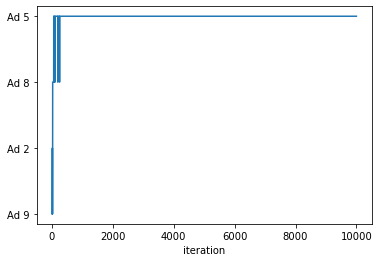

In [56]:
plt.plot(l)
plt.xlabel("iteration");

#  MEDİUM-MACHİNE

Ucb(Upper Confidence Bound) algoritması Takviyeli/Pekiştirmeli öğrenmede kullanılan bir algoritmadır.Kabülü her olayın arkasında bir dağılım vardır. Ucb algoritmasında ilk aşamada tüm makineleri yani tüm eylemleri keşfetmeye çalışıyoruz. Ardından en tüksek güven sınırına sahip olan makineyi bulup maximum ödül kazanmak için o makineyi kullanıyoruz.

Algoritma her olayın arkasında bir dağılımın olduğu inancındadır. Pekiştirlmeli öğrenmede önceki tecrübeleri kullanarak öğrenme vardır. Kullanıcı her seferin bir eylem yapar ve bu eylem sonucunda ödül verilir veya verilmez. Amaç olabildiğince fazla ödül kazanmak.

Bir oyun salonundaki slot makineler ile oyun oynayacağınızı düşünün. Kolu çevirdiğinizde gerekli koşullar sağlanıyorsa makine ödül verir değilse vermez. 6 farklı slot makinesi var ve siz bu makinelerin hangisinin daha fazla ödül verebileceğini bulup onunla oynamak istiyorsunuz.  Peki en fazla ödül verecek olan makineyi nasıl bulmamız gerekir? 

Algoritma bu makineler üzerinde bir kaç tur deneme yaparak kar oranı fazla olan makineyi bulmaya çalışır.

Her turda bir makine seçmemiz gerekir. Başlangıçta tüm makinelerin güven aralıkları eşit olduğu için M1 makinesini seçip oynuyoruz. M1 ilk turda ödül vermedi. Ödülümüz 0. Tüm makinelerin güven aralıklarını hesaplayıp 2. turda hangi makinenin ödül verme ihtimali daha yüksekse onu seçiyoruz. İlk turda tüm makineler 0 verdiği için  güven aralıkları eşit. Herhangi birisini seçip(M1'i seçelim) ve 2. tura geçelim. 2. turda M2, M5 ve M6 makineleri ödül vermiş. Bizim seçtiğimiz M1 makinesi ise tekrar ödül vermedi. Toplam ödülümüz tekrar 0 olur. 3. tura geçmeden önce tekrar güven aralıklarını hesaplayıp bir makine seçmemiz gerekir. M2, M5 ve M6 makinelerinin güven aralıkları eşit olacaktır. Bu 3 makineden birini seçip(M5 seçelim) 3. tura geçelim. 3. turda M1 ve M6 makineleri ödül vermiş. Seçilen(M5) makine tekrar ödül vermedi. Toplam ödül=0 olur. M1 ve M6 makineleri için güven aralıklarını hesaplarsak M6 makinesinin güven aralığı daha yüksek çıkar. O zaman 4.tura geçerken seçeceğimiz makine M6 olacaktır. Algoritma bu şekilde devam eder. Hangi makineden daha fazla ödül kazanma ihtimali varsa algoritma onu seçer.

* Her makinenin tek tip bir Güven Aralığına ve bir başarı dağılımına sahip olduğu varsayılır.
* Başlangıçta tüm makineler aynı güven aralığını sahip olduğu için oynamak için rastgele bir makine seçilir .
* Makinelerin ödül verip vermeme durumlarına göre güven aralığı hesaplanır ve bir sonraki turda güven aralığı en yüksek olan makine seçilir.

Peki nedir bu güven aralığı(Confidence Interval)?
<p><strong>Güven aralığı</strong> herhangi bir eylemin ne kadar doğru olduğunu veya eyleme ne kadar güvenebileceğimizi ifade eder.
Ucb(Üst güven sınırı) algoritmasında güven sınırı en yüksek olan eylem/makine seçilir. Hangi eylemin/makinenin üst güven sınırı daha yüksekse o eylemin/makinenin ödül verme ihtimali daha fazladır.
<p>Ucb değeri hesaplama işlemleri için aşağıdaki formüller kullanılır.

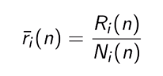

In [79]:
from PIL import Image
Image.open(r"C:\Users\akmet\Desktop\avg_reward.png")

* <strong>ri(n) =</strong>  o adıma/tura kadar olan i makinesinin ortalama ödülü
* <strong>Ri(n) =</strong> o ana kadar ki i makinesinden gelen toplam ödül
* <strong>Ni(n) =</strong>  o ana kadar ki i makinesinin oynanma sayısı

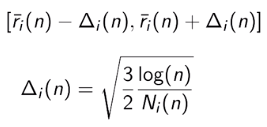

In [80]:
Image.open(r"C:\Users\akmet\Desktop\f2.png")

* <strong>ri(n)-Δi(n) =</strong> (Lower Confidence Bound) Alt güven sınırı
* <strong>ri(n)+Δi(n) =</strong> (Upper Confidence Bound)UCB-Üst güven sınırı
* <strong>Δi(n) = </strong> Güven aralığı için aşağı ve yukarı oynama potansiyeli

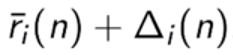

In [81]:
Image.open(r"C:\Users\akmet\Desktop\UCB.png")

yukarıdaki formül de bize ucb değerini yani üst güven sınırını verecektir

Bunu bir örnek üzerinden python ile uygulayarak görelim.

Gerekli modülleri yükleyelim.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veri setini tanıyalım

In [3]:
data = pd.read_csv("slot_machine.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head() # ilk 5 satır

,M1,M2,M3,M4,M5,M6
0,0,0,0,0,0,0
1,0,1,0,0,1,1
2,1,0,0,0,0,1
3,1,1,1,0,0,1
4,0,1,0,0,1,1


In [14]:
data.sum()

M1    493
M2    513
M3    509
M4    465
M5    545
M6    499
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   M1      1000 non-null   int64
 1   M2      1000 non-null   int64
 2   M3      1000 non-null   int64
 3   M4      1000 non-null   int64
 4   M5      1000 non-null   int64
 5   M6      1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


veri setinde 6 farklı makine ve toplam 1000 tane işlem(tur) vardır. Her bir işlem sonucunda makine ödül vermişse 1 vermemişse 0 olarak girilmiş. İlk işlemde hiç bir makine ödül vermemiş, ikinci işlemde M2, M5 ve M6 makineleri ödül vermiştir.

Bu verileri kullanarak makinelerden olabildiğince fazla ödül kazanmak istiyoruz. Ucb algoritması ile bu  makineler üzerindeki dağılımlardan faydalanarak en fazla ödül verebilme ihtimali olan makineyi seçip onunla oynamak istiyoruz.

Yukarıdaki formüllerde verilen Ri ve Ni yani makinenin kullanılma sayısı ve makinenin verdiği ödülleri tutmak için dict yapısında Ri ve Ni tanımlayalım. Tüm makinelerin başlangıç Ri ve Ni değerleri sıfırdır.

In [4]:
Ni = {} # makine kullanma
Ri = {} # makine ödüllleri
Ni.update(zip(list(data.columns.values),[0]*len(data.columns)))
Ri.update(zip(list(data.columns.values),[0]*len(data.columns)))
print("Ri: ",Ri)
print("Ni: ",Ni)

Ri:  {'M1': 0, 'M2': 0, 'M3': 0, 'M4': 0, 'M5': 0, 'M6': 0}
Ni:  {'M1': 0, 'M2': 0, 'M3': 0, 'M4': 0, 'M5': 0, 'M6': 0}


Hangi makine kullanıldıysa onun Ni'deki değeri 1 artıralacak ve o makinenin verdiği ödül Ri de ödüllere eklenecek. M4 makinesi kullanıldıysa Ni de M4'ün değeri 1 artacak ve ve dönen ödül(0 veya 1 ) Ri de M4 hanesine eklenecek

ardından algoritmanın asıl çalıştığı kod bloğunu yazalım.

In [7]:
secilen = []
total_reward = 0
for i in range(0,len(data)):
    for j in data.columns:
        m_ödül = data[j][i]
        Ni[j] = Ni[j]+1
        Ri[j] = Ri[j]+m_ödül
        sec = ucb_calculater(Ri,Ni,data)
    total_reward = total_reward+data[sec][i]
    secilen.append(sec)
print("toplam ödül: ",total_reward)

toplam ödül:  557


secilen makineleri tutmak için boş bir liste tanımladık. Daha sonra bunu görselleştirme için kullanacağız. Ardından seçilen makinenin verdiği ödülleri toplamak için total_reward adıdan bir değişken tanımladık ve başlangıç değeri 0'dır.
for döngüleri ile her bir işlem için her bir makinenin durumlarını kontrol ettik. Her döngüde makinenin kullanılmasını 1 arttırdık ve makinenin verdiği ödülü Ri de makinenin hanesine ekledik. ucb_calculater ile her bir turda makinelerin ucb değerli hesaplayarak en yüksek ucb hangi makinede ise o makine seçiyoruz ve seçilenler listesine ekliyoruz. Seçilen makinenin ödül değerini de total_reward değişkenin ekliyoruz böylece  toplamda ne kadar ödül toplayabildiğimizi göreceğiz.

ucb değerlerini hesaplayacak olan ucb_calculater adlı fonksiyonumuz tanımlayalım.

In [6]:
def ucb_calculater(Ri,Ni,data):
    ucbs = {}
    for i in Ri.keys():
        if Ri[i]>0:
            mean = Ri[i]/Ni[i]
            delta = ((3/2)*(np.log(len(data))/(Ni[i])))**(1/2)
            ucbs[i] = (mean+delta)
    if len(ucbs) ==0:
        result = list(Ri.keys())[0]
    else:
        result = sorted(ucbs.items(),key= lambda x: x[1])[-1][0]
    return result

tüm makinelerin ucb değerlerini tutmak ucbs adında dict yapısında bir değişken tanımladık. Ardından Ri ve Ni içinden makinelerin ödül ve kullanılma sayılarını çekip formüllerde belirtilen gerekli hesaplamaları yaptık. Makineleri ucb değerlerine göre sıralayıp en yüksek ucb değerine sahip olan makineyi döndürdük.

2.kod bloğunu çalıştırdığımızda Toplam ödül = 557 şeklinde bir çıktı görmeyi bekleriz. Tüm makineler içinde en fazla ödül veren 545 ile M5 makinesi idi. Algoritma M5 makinesinin max ucb değerini bulana kadar diğer makineler ile deneme yaptı ve M5 bulunduktan sonra bunda ısrarcı olmuş neticede toplam ödülümüzü 557 bulmuş oldu.  

Seçilen makineleri görselleştirelim

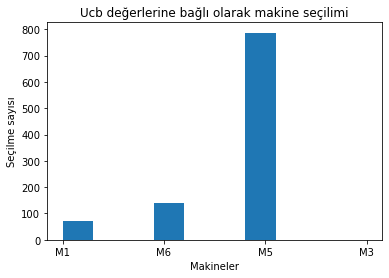

In [8]:
plt.hist(secilen)
plt.xlabel("Makineler")
plt.ylabel("Seçilme sayısı")
plt.title("Ucb değerlerine bağlı olarak makine seçilimi");

histogramdan da anlaşıldığı üzere işlemlerin büyük çoğunluğunda M5 makinesinin ucb değerleri daha yüksek çıkmış ve algoritma buna bağlı olarak M5 makinesini seçmiş

plot çizdirelim.

In [9]:
dd = {}
dd.update(zip(list(set(secilen)),[0]*len(list(set(secilen)))))
for i,j in zip(list(dd.keys()),[secilen.count(i) for i in list(set(secilen))]):
    dd[i] = j
    
dd

{'M5': 787, 'M3': 1, 'M6': 139, 'M1': 73}

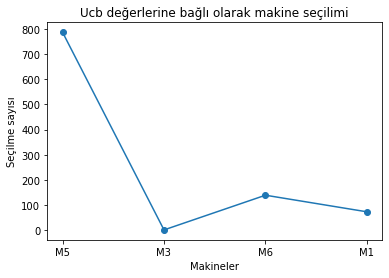

In [10]:
plt.plot(dd.keys(),dd.values(),marker='o')
plt.xlabel("Makineler")
plt.ylabel("Seçilme sayısı")
plt.title("Ucb değerlerine bağlı olarak makine seçilimi");

Tüm kodları daha toplu bir hale getirelim.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("slot_machine.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)
#data.head() # ilk 5 satır


def ucb(data):
    Ni = {} # makine kullanma
    Ri = {} # makine ödüllleri
    Ni.update(zip(list(data.columns.values),[0]*len(data.columns)))
    Ri.update(zip(list(data.columns.values),[0]*len(data.columns)))
    #print("Ri: ",Ri)
    #print("Ni: ",Ni)
    secilen = []
    total_reward = 0
    for i in range(0,len(data)):
        for j in data.columns:
            m_ödül = data[j][i]
            Ni[j] = Ni[j]+1
            Ri[j] = Ri[j]+m_ödül
            sec = ucb_calculater(Ri,Ni,data)
        total_reward = total_reward+data[sec][i]
        secilen.append(sec)
    print("toplam ödül: ",total_reward)
    return secilen

def ucb_calculater(Ri,Ni,data):
    ucbs = {}
    for i in Ri.keys():
        if Ri[i]>0:
            mean = Ri[i]/Ni[i]
            delta = ((3/2)*(np.log(len(data))/(Ni[i])))**(1/2)
            ucbs[i] = (mean+delta)
    if len(ucbs) ==0:
        result = list(Ri.keys())[0]
    else:
        result = sorted(ucbs.items(),key= lambda x: x[1])[-1][0]
    return result

def visualization(secilen):
    plt.hist(secilen)
    plt.xlabel("Makineler")
    plt.ylabel("Seçilme sayısı")
    plt.title("Ucb değerlerine bağlı olarak makine seçilimi")
    plt.show();
    
    dd = {}
    dd.update(zip(list(set(secilen)),[0]*len(list(set(secilen)))))
    for i,j in zip(list(dd.keys()),[secilen.count(i) for i in list(set(secilen))]):
        dd[i] = j
        
    plt.plot(dd.keys(),dd.values(),marker='o')
    plt.xlabel("Makineler")
    plt.ylabel("Seçilme sayısı")
    plt.title("Ucb değerlerine bağlı olarak makine seçilimi")
    plt.show();